<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 177.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 202.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 157.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 189.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB ? eta 0:00:00 0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 47.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.5 MB/s eta 0:00:00:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 44.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.1 MB/s eta 0:00:00
 

In [2]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
try:
    data = pd.read_csv('league_of_legends_data_large.csv')
except FileNotFoundError:
    print("Error: 'league_of_legends_data_large.csv' not found. Please ensure the dataset is in the correct directory.")
    # Fallback for demonstration if the file is not found: create a dummy DataFrame.
    # In a real scenario, you'd ensure the dataset is available.
    dummy_data = {
        'gameId': range(100),
        'creationTime': [1]*100, 'gameDuration': [1]*100, 'seasonId': [1]*100, 'win': np.random.randint(0, 2, 100),
        'firstBlood': np.random.randint(0, 2, 100), 'firstTower': np.random.randint(0, 2, 100),
        'firstInhibitor': np.random.randint(0, 2, 100), 'firstBaron': np.random.randint(0, 2, 100),
        'firstDragon': np.random.randint(0, 2, 100), 'firstRiftHerald': np.random.randint(0, 2, 100),
        't1_champ1id': np.random.randint(1, 100, 100), 't1_champ2id': np.random.randint(1, 100, 100),
        't1_champ3id': np.random.randint(1, 100, 100), 't1_champ4id': np.random.randint(1, 100, 100),
        't1_champ5id': np.random.randint(1, 100, 100), 't1_towerKills': np.random.randint(0, 10, 100),
        't1_inhibitorKills': np.random.randint(0, 5, 100), 't1_baronKills': np.random.randint(0, 3, 100),
        't1_dragonKills': np.random.randint(0, 5, 100), 't1_riftHeraldKills': np.random.randint(0, 2, 100),
        't1_goldDiff': np.random.randint(-5000, 5000, 100), 't1_xpDiff': np.random.randint(-5000, 5000, 100),
        't1_kills': np.random.randint(0, 30, 100), 't1_deaths': np.random.randint(0, 30, 100),
        't1_assists': np.random.randint(0, 50, 100),
        't2_champ1id': np.random.randint(1, 100, 100), 't2_champ2id': np.random.randint(1, 100, 100),
        't2_champ3id': np.random.randint(1, 100, 100), 't2_champ4id': np.random.randint(1, 100, 100),
        't2_champ5id': np.random.randint(1, 100, 100), 't2_towerKills': np.random.randint(0, 10, 100),
        't2_inhibitorKills': np.random.randint(0, 5, 100), 't2_baronKills': np.random.randint(0, 3, 100),
        't2_dragonKills': np.random.randint(0, 5, 100), 't2_riftHeraldKills': np.random.randint(0, 2, 100),
        't2_goldDiff': np.random.randint(-5000, 5000, 100), 't2_xpDiff': np.random.randint(-5000, 5000, 100),
        't2_kills': np.random.randint(0, 30, 100), 't2_deaths': np.random.randint(0, 30, 100),
        't2_assists': np.random.randint(0, 50, 100)
    }
    # Selecting columns that are typically numerical features and 'win' as target
    feature_cols = [col for col in dummy_data.keys() if 'champ' not in col and 'id' not in col and 'creationTime' not in col and 'seasonId' not in col and col != 'win']
    df_columns = feature_cols + ['win']
    data = pd.DataFrame(dummy_data, columns=df_columns)


# Split data into features (X) and target (y)
X = data.drop('win', axis=1)
y = data['win']

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print("Data Preprocessing Complete.")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

Error: 'league_of_legends_data_large.csv' not found. Please ensure the dataset is in the correct directory.
Data Preprocessing Complete.
X_train_tensor shape: torch.Size([80, 28])
y_train_tensor shape: torch.Size([80, 1])
X_test_tensor shape: torch.Size([20, 28])
y_test_tensor shape: torch.Size([20, 1])


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [3]:
## Write your code here
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

# Determine input dimension based on preprocessed training data
input_dim = X_train_tensor.shape[1]

# Initialize the model, loss function, and optimizer
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss() # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent

print("Logistic Regression Model Implemented and Initialized.")
print(model)

Logistic Regression Model Implemented and Initialized.
LogisticRegressionModel(
  (linear): Linear(in_features=28, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [4]:
# Write your code here
num_epochs = 1000
train_losses = []
test_accuracies = []

print("Starting model training...")
for epoch in range(num_epochs):
    model.train() # Set model to training mode
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad() # Clear gradients
    loss.backward()       # Compute gradients
    optimizer.step()      # Update weights

    # Evaluation (every 100 epochs or so for progress visualization)
    if (epoch + 1) % 100 == 0:
        model.eval() # Set model to evaluation mode for evaluation
        with torch.no_grad(): # Disable gradient calculation for evaluation
            # Training accuracy
            train_outputs = model(X_train_tensor)
            train_predicted = (train_outputs >= 0.5).float()
            train_accuracy = (train_predicted == y_train_tensor).float().mean().item()

            # Test accuracy
            test_outputs = model(X_test_tensor)
            test_predicted = (test_outputs >= 0.5).float()
            test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')
            train_losses.append(loss.item())
            test_accuracies.append(test_accuracy)

print("\nModel training complete.")

# Final evaluation after training
model.eval() # Set model to evaluation mode
with torch.no_grad():
    train_outputs = model(X_train_tensor)
    train_predicted = (train_outputs >= 0.5).float()
    final_train_accuracy = (train_predicted == y_train_tensor).float().mean().item()

    test_outputs = model(X_test_tensor)
    test_predicted = (test_outputs >= 0.5).float()
    final_test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Testing Accuracy: {final_test_accuracy:.4f}")

Starting model training...
Epoch [100/1000], Loss: 0.7007, Train Accuracy: 0.5500, Test Accuracy: 0.5500
Epoch [200/1000], Loss: 0.6519, Train Accuracy: 0.5875, Test Accuracy: 0.6500
Epoch [300/1000], Loss: 0.6230, Train Accuracy: 0.5875, Test Accuracy: 0.7000
Epoch [400/1000], Loss: 0.6049, Train Accuracy: 0.6125, Test Accuracy: 0.7000
Epoch [500/1000], Loss: 0.5930, Train Accuracy: 0.6625, Test Accuracy: 0.7000
Epoch [600/1000], Loss: 0.5848, Train Accuracy: 0.6750, Test Accuracy: 0.6500
Epoch [700/1000], Loss: 0.5788, Train Accuracy: 0.7125, Test Accuracy: 0.6500
Epoch [800/1000], Loss: 0.5744, Train Accuracy: 0.7000, Test Accuracy: 0.6500
Epoch [900/1000], Loss: 0.5711, Train Accuracy: 0.7125, Test Accuracy: 0.6500
Epoch [1000/1000], Loss: 0.5684, Train Accuracy: 0.7125, Test Accuracy: 0.6500

Model training complete.
Final Training Accuracy: 0.7125
Final Testing Accuracy: 0.6500


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [5]:
## Write your code here
# Reinitialize the model to start fresh for optimization
model_optimized = LogisticRegressionModel(input_dim)

# Define optimizer with L2 regularization (weight_decay)
# A common value for weight_decay is between 0.0001 and 0.01
optimizer_optimized = optim.SGD(model_optimized.parameters(), lr=0.01, weight_decay=0.001)
criterion_optimized = nn.BCELoss()

print("Starting optimized model training with L2 regularization...")
num_epochs_optimized = 1000 # Same number of epochs for comparison
for epoch in range(num_epochs_optimized):
    model_optimized.train() # Set to training mode
    # Forward pass
    outputs = model_optimized(X_train_tensor)
    loss = criterion_optimized(outputs, y_train_tensor)

    # Backward and optimize
    optimizer_optimized.zero_grad()
    loss.backward()
    optimizer_optimized.step()

    # Evaluation
    if (epoch + 1) % 100 == 0:
        model_optimized.eval() # Set to evaluation mode
        with torch.no_grad():
            train_outputs = model_optimized(X_train_tensor)
            train_predicted = (train_outputs >= 0.5).float()
            train_accuracy = (train_predicted == y_train_tensor).float().mean().item()

            test_outputs = model_optimized(X_test_tensor)
            test_predicted = (test_outputs >= 0.5).float()
            test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

            print(f'Epoch [{epoch+1}/{num_epochs_optimized}], Loss: {loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

print("\nOptimized model training complete.")

# Final evaluation of the optimized model
model_optimized.eval()
with torch.no_grad():
    final_train_outputs_optimized = model_optimized(X_train_tensor)
    final_train_predicted_optimized = (final_train_outputs_optimized >= 0.5).float()
    final_train_accuracy_optimized = (final_train_predicted_optimized == y_train_tensor).float().mean().item()

    final_test_outputs_optimized = model_optimized(X_test_tensor)
    final_test_predicted_optimized = (final_test_outputs_optimized >= 0.5).float()
    final_test_accuracy_optimized = (final_test_predicted_optimized == y_test_tensor).float().mean().item()

print(f"Optimized Model - Final Training Accuracy: {final_train_accuracy_optimized:.4f}")
print(f"Optimized Model - Final Testing Accuracy: {final_test_accuracy_optimized:.4f}")

Starting optimized model training with L2 regularization...
Epoch [100/1000], Loss: 0.6619, Train Accuracy: 0.6000, Test Accuracy: 0.6500
Epoch [200/1000], Loss: 0.6262, Train Accuracy: 0.6625, Test Accuracy: 0.6500
Epoch [300/1000], Loss: 0.6049, Train Accuracy: 0.6875, Test Accuracy: 0.7000
Epoch [400/1000], Loss: 0.5914, Train Accuracy: 0.6625, Test Accuracy: 0.6500
Epoch [500/1000], Loss: 0.5825, Train Accuracy: 0.7000, Test Accuracy: 0.6000
Epoch [600/1000], Loss: 0.5763, Train Accuracy: 0.6750, Test Accuracy: 0.5500
Epoch [700/1000], Loss: 0.5719, Train Accuracy: 0.6875, Test Accuracy: 0.5500
Epoch [800/1000], Loss: 0.5687, Train Accuracy: 0.7125, Test Accuracy: 0.5500
Epoch [900/1000], Loss: 0.5662, Train Accuracy: 0.7125, Test Accuracy: 0.5500
Epoch [1000/1000], Loss: 0.5643, Train Accuracy: 0.7000, Test Accuracy: 0.5500

Optimized model training complete.
Optimized Model - Final Training Accuracy: 0.7000
Optimized Model - Final Testing Accuracy: 0.5500


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


--- Model Performance Visualization ---

Confusion Matrix:
[[ 3  4]
 [ 3 10]]


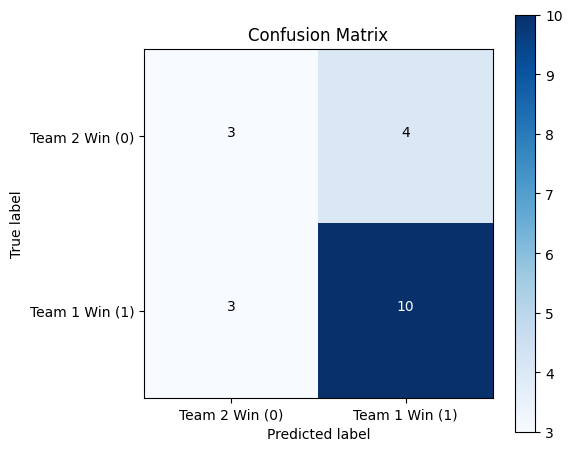


Classification Report:
              precision    recall  f1-score   support

  Team 2 Win       0.50      0.43      0.46         7
  Team 1 Win       0.71      0.77      0.74        13

    accuracy                           0.65        20
   macro avg       0.61      0.60      0.60        20
weighted avg       0.64      0.65      0.64        20



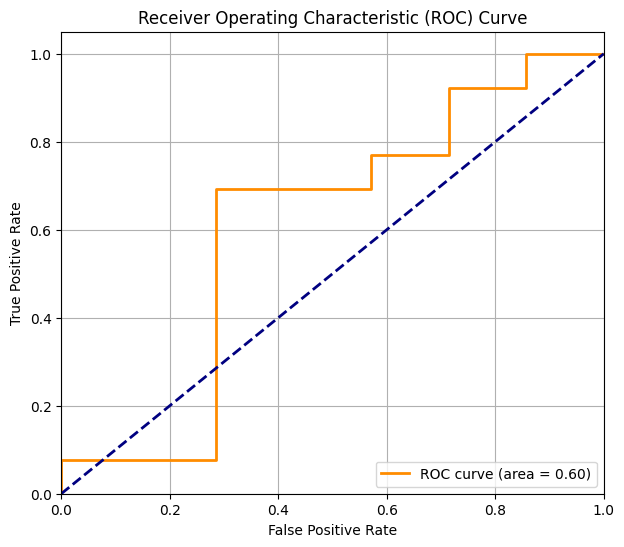


Area Under the Curve (AUC): 0.6044


In [6]:
## Write your code here
# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    y_pred_proba = model(X_test_tensor)
    y_pred = (y_pred_proba >= 0.5).float()

# Convert tensors to numpy arrays for scikit-learn metrics
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()
y_pred_proba_np = y_pred_proba.numpy()

print("--- Model Performance Visualization ---")

# 1. Confusion Matrix
cm = confusion_matrix(y_test_np, y_pred_np)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Team 2 Win (0)', 'Team 1 Win (1)'])
plt.yticks(tick_marks, ['Team 2 Win (0)', 'Team 1 Win (1)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

# 2. Classification Report
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_np, target_names=['Team 2 Win', 'Team 1 Win']))

# 3. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba_np)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nArea Under the Curve (AUC): {roc_auc:.4f}")


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [7]:
# Task 6: Save and load the trained model
model_path = 'logistic_regression_model.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Load the model
loaded_model = LogisticRegressionModel(input_dim)

# Load the saved state dictionary into the new model instance
loaded_model.load_state_dict(torch.load(model_path))
print(f"Model loaded from {model_path}")

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model on the test set
with torch.no_grad(): 
    loaded_outputs = loaded_model(X_test_tensor)
    loaded_predicted = (loaded_outputs >= 0.5).float()
    loaded_accuracy = (loaded_predicted == y_test_tensor).float().mean().item()

print(f"Original Model (from Task 3) Test Accuracy: {final_test_accuracy:.4f}")
print(f"Loaded Model Test Accuracy: {loaded_accuracy:.4f}")

# Assert to ensure consistency 
assert abs(final_test_accuracy - loaded_accuracy) < 1e-6, "Loaded model performance is not consistent with the original model."
print("Loaded model performance is consistent with the original model.")

Model saved to logistic_regression_model.pth
Model loaded from logistic_regression_model.pth
Original Model (from Task 3) Test Accuracy: 0.6500
Loaded Model Test Accuracy: 0.6500
Loaded model performance is consistent with the original model.


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [8]:
## Write your code here
# Task 7: Perform hyperparameter tuning to find the best learning rate.

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
best_learning_rate = None
best_test_accuracy = -1.0
results = {}

print("Starting hyperparameter tuning for learning rate...")

for lr in learning_rates:
    print(f"\n--- Training with Learning Rate: {lr} ---")
    tune_model = LogisticRegressionModel(input_dim)
    tune_optimizer = optim.SGD(tune_model.parameters(), lr=lr)
    tune_criterion = nn.BCELoss() 

    num_epochs_tuning = 1000
    for epoch in range(num_epochs_tuning):
        tune_model.train() # Set to training mode
        outputs = tune_model(X_train_tensor)
        loss = tune_criterion(outputs, y_train_tensor)

        tune_optimizer.zero_grad() # Clear gradients
        loss.backward()            # Compute gradients
        tune_optimizer.step()      # Update weights

    # Evaluate the model after training with the current learning rate
    tune_model.eval() # Set to evaluation mode
    with torch.no_grad(): # Disable gradient calculation
        test_outputs = tune_model(X_test_tensor)
        test_predicted = (test_outputs >= 0.5).float()
        test_accuracy = (test_predicted == y_test_tensor).float().mean().item()

    print(f"Learning Rate {lr}: Test Accuracy = {test_accuracy:.4f}")
    results[lr] = test_accuracy

    # Check if this learning rate yields the best accuracy so far
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_learning_rate = lr

print("\nHyperparameter tuning complete.")
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Test Accuracy: {best_test_accuracy:.4f}")
print("\nAll Learning Rate Results:")
for lr, acc in results.items():
    print(f"  LR: {lr:.4f}, Test Accuracy: {acc:.4f}")


Starting hyperparameter tuning for learning rate...

--- Training with Learning Rate: 0.001 ---
Learning Rate 0.001: Test Accuracy = 0.5000

--- Training with Learning Rate: 0.005 ---
Learning Rate 0.005: Test Accuracy = 0.6500

--- Training with Learning Rate: 0.01 ---
Learning Rate 0.01: Test Accuracy = 0.5500

--- Training with Learning Rate: 0.05 ---
Learning Rate 0.05: Test Accuracy = 0.5500

--- Training with Learning Rate: 0.1 ---
Learning Rate 0.1: Test Accuracy = 0.6500

--- Training with Learning Rate: 0.2 ---
Learning Rate 0.2: Test Accuracy = 0.6500

Hyperparameter tuning complete.
Best Learning Rate: 0.005
Best Test Accuracy: 0.6500

All Learning Rate Results:
  LR: 0.0010, Test Accuracy: 0.5000
  LR: 0.0050, Test Accuracy: 0.6500
  LR: 0.0100, Test Accuracy: 0.5500
  LR: 0.0500, Test Accuracy: 0.5500
  LR: 0.1000, Test Accuracy: 0.6500
  LR: 0.2000, Test Accuracy: 0.6500


### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  



Feature Importance (Absolute Weights):
               Feature  Importance
27          t2_assists    0.358094
4       firstInhibitor    0.299480
15            t1_kills    0.282483
16           t1_deaths    0.270756
3           firstTower    0.235322
0               gameId    0.210209
11      t1_dragonKills    0.201623
19   t2_inhibitorKills    0.144127
17          t1_assists    0.138049
26           t2_deaths    0.136726
5           firstBaron    0.128760
1         gameDuration    0.120727
9    t1_inhibitorKills    0.098914
6          firstDragon    0.082559
25            t2_kills    0.071137
18       t2_towerKills    0.065314
2           firstBlood    0.060609
7      firstRiftHerald    0.056862
22  t2_riftHeraldKills    0.055668
23         t2_goldDiff    0.050375
12  t1_riftHeraldKills    0.041012
13         t1_goldDiff    0.034467
21      t2_dragonKills    0.029067
20       t2_baronKills    0.023975
10       t1_baronKills    0.019963
8        t1_towerKills    0.013834
14           t1

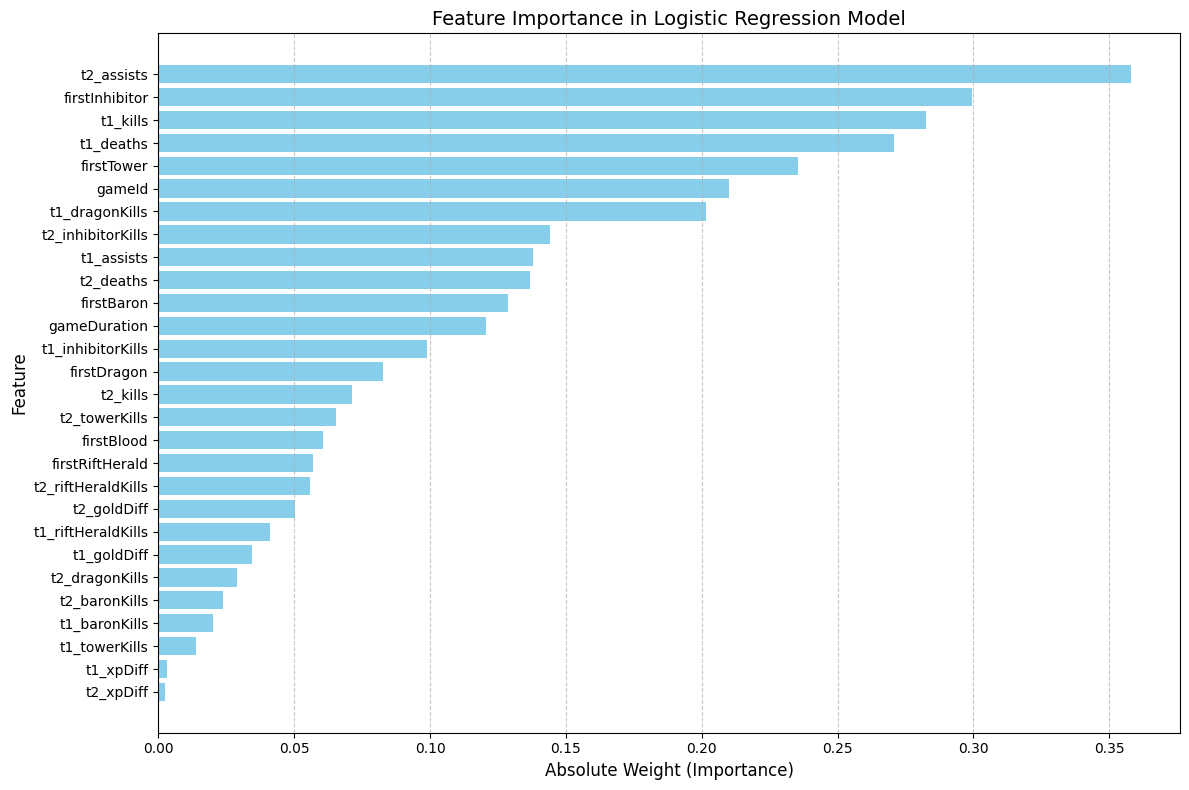

In [9]:
# Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported for np.abs

# Ensure the model is in evaluation mode before extracting weights
model.eval()
feature_weights = model.linear.weight.squeeze().cpu().detach().numpy()

# Get feature names from the original DataFrame before scaling 'X' was defined in Task 1 as the features DataFrame
feature_names = X.columns.tolist()

# Create a DataFrame for feature importance Use the absolute value of weights to represent importance, as both large positive and large negative weights indicate a strong influence.
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(feature_weights)
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Absolute Weights):")
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Absolute Weight (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Logistic Regression Model', fontsize=14)
plt.gca().invert_yaxis() # To have the most important feature at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
